# Regresión Lineal con scikit-learn. Introducción

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
plt.style.use("seaborn-v0_8-whitegrid")

A continuación se crean 2 arreglos que corresponden al presupuesto y las ganancias (en millones de dólares) de 10 películas. El objetivo es hacer predicciones usando regresión lineal.

In [2]:
budget = np.array([5, 10, 17, 27, 35, 40, 42, 49, 54, 60])

In [3]:
revenue = np.array([2.6, 19., 23.8, 26.9, 41.1, 58.3, 40.3, 58.7, 73.1, 69.7])

In [4]:
df = pd.DataFrame(data = {"revenue":revenue, "budget":budget})
df

,revenue,budget
0,2.6,5
1,19.0,10
2,23.8,17
3,26.9,27
4,41.1,35
5,58.3,40
6,40.3,42
7,58.7,49
8,73.1,54
9,69.7,60


Como siempre lo mejor es realizar una gráfica y en este ejemplo lo más conveniente es realizar una gráfica de dispersión (scatter) con el presupuesto (budget) en el eje x y las ganancias (revenue) en el eje y. 
En la gráfica claramente se aprecia una relación lineal entre el presupuesto y las ganancias.  
Ahora vamos a definir un modelo simple de regresión lineal.

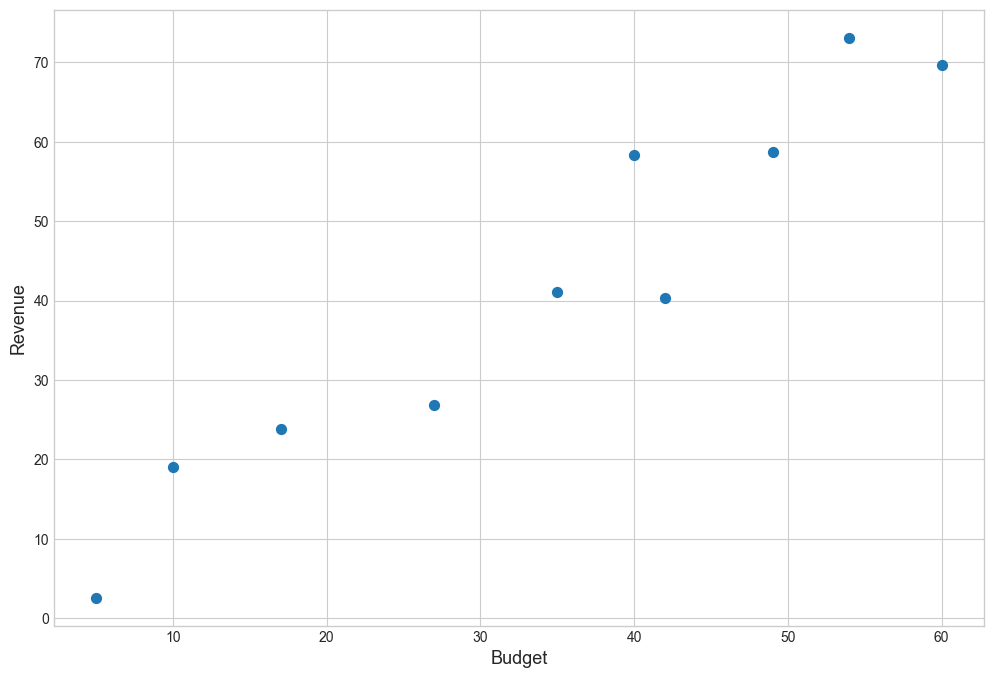

In [5]:
plt.figure( figsize = (12, 8))
plt.scatter(x = df.budget, y = df.revenue, s = 50)
plt.xlabel("Budget", fontsize = 13)
plt.ylabel("Revenue", fontsize = 13)
plt.show()

<h3> Relación Lineal entre Presupuesto y Ganacias</h3>

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
lm = LinearRegression(fit_intercept=True)

In [8]:
lm.fit(X = df.budget.to_frame(), y = df.revenue) # ajuste del modelo (regresión lineal)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [9]:
slope = lm.coef_ # pendiente de la recta de regresión
slope

array([1.19897684])

In [10]:
intercept = lm.intercept_ # corte con el eje y de la recta de regresión
intercept

np.float64(0.7046849757673712)

En el próximo paso podemos predecir las ganacias de las películas basados en el presupuesto y la recta de regresión lineal.  
Realmente esto no corresponde a una predicción porque estos no son datos nuevos o frescos y sus ganancias ya son conocidas.

 


Aun así, podemos predecir los ingresos basándonos en el modelo lineal. Podemos hacerlo sin predecir, y tenemos que pasar, de nuevo, la variable independiente "presupuesto" y crear la nueva columna "pred".

In [11]:
df["pred"] = lm.predict(df.budget.to_frame())
df

,revenue,budget,pred
0,2.6,5,6.699569
1,19.0,10,12.694453
2,23.8,17,21.087291
3,26.9,27,33.077060
4,41.1,35,42.668875
5,58.3,40,48.663759
6,40.3,42,51.061712
7,58.7,49,59.454550
8,73.1,54,65.449435
9,69.7,60,72.643296


Así que aquí tenemos los ingresos reales del presupuesto y las predicciones de ingresos basadas en el modelo lineal.
En la primera película, la predicción es de ingresos de 6.7 millones, mientras que los ingresos reales son de solo 2.6 millones.
Y también aquí, es mejor visualizar esto, ya que, de hecho, una línea recta se describe completamente con dos puntos de datos.
Así que, creemos dos puntos de datos con los valores X de 0 y 100.
Y luego pasamos los puntos de datos a nuestra ecuación lineal.
Así que los valores de Y son iguales a la intersección, más la pendiente multiplicada por los valores de X.  
Y, al hacerlo, calculamos los valores Y correspondientes a los valores X, el cero y el cien.
Así que veamos.

In [12]:
x_lin = np.array([0, 100])
y_lin = intercept + slope * x_lin

In [13]:
y_lin

array([  0.70468498, 120.60236941])

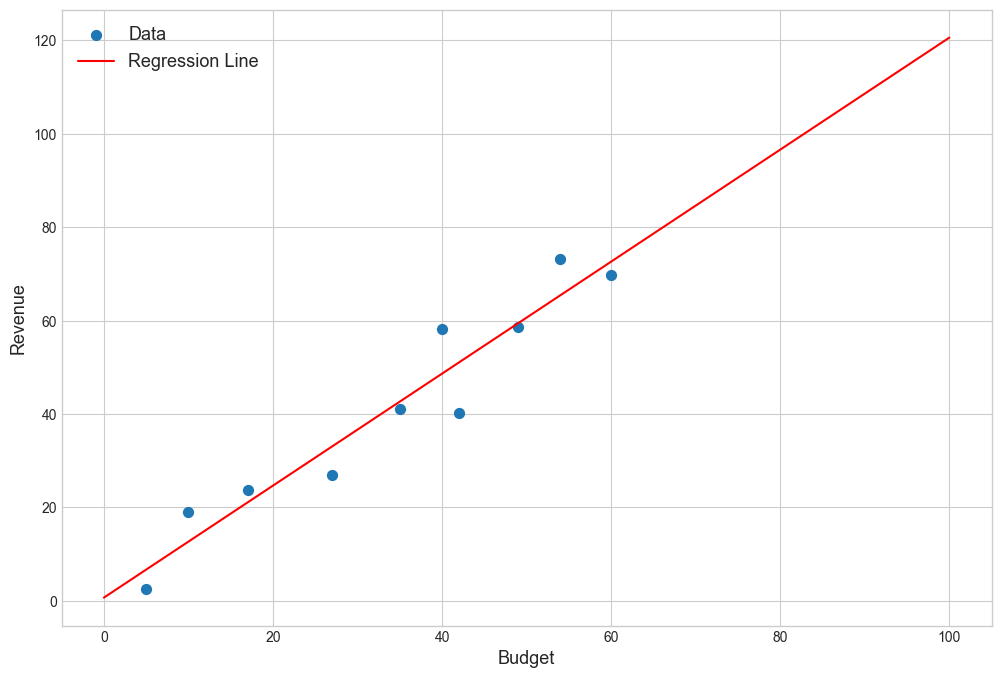

In [14]:
plt.figure(figsize = (12, 8))
plt.scatter(x = df.budget, y = df.revenue, s = 50, label = "Data")
plt.plot(x_lin, y_lin, c = "red", label = "Regression Line")
plt.xlabel("Budget", fontsize = 13)
plt.ylabel("Revenue", fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

<h3> Realizando Predicciones con Regresión LIneal </h3>
Se usan datos nuevos de presupuesto ganancias de películas

In [15]:
budget_new = np.array([63, 66, 74, 80, 85])

In [16]:
revenue_new = np.array([74.2, 80.7, 98.2, 94.8, 101.7])

In [17]:
df_new = pd.DataFrame(data = {"revenue": revenue_new, "budget": budget_new})
df_new

,revenue,budget
0,74.2,63
1,80.7,66
2,98.2,74
3,94.8,80
4,101.7,85


De nuevo organizamos los nuevos datos en el dataframe df_new. Recordar que nuestro modelo de reresion lineal lm fué ajustado con los datos originales correspondientes a 10 películas.  
Entonces, basados en este modelo podemos predecir las ganancias de los nuevos datos y comparar la predicción con las ganancias reales. Esto se hace simplemente con lm.predict y pasándole los datos de presupuesto como un dataframe y creando la columna predict:


In [18]:
df_new["pred"] = lm.predict(df_new.budget.to_frame())
df_new

,revenue,budget,pred
0,74.2,63,76.240226
1,80.7,66,79.837157
2,98.2,74,89.428971
3,94.8,80,96.622833
4,101.7,85,102.617717


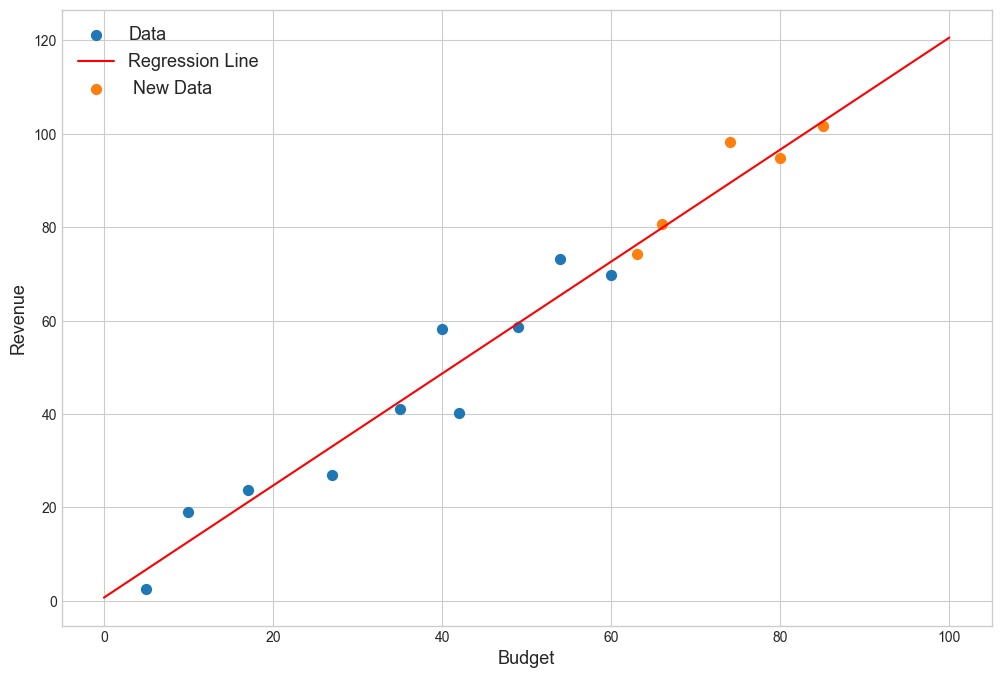

In [19]:
plt.figure(figsize = (12, 8))
plt.scatter(x = df.budget, y = df.revenue, s = 50, label = "Data")
plt.plot(x_lin, y_lin, c = "red", label = "Regression Line")
plt.scatter(x = df_new.budget, y = df_new.revenue, s = 50, label = " New Data")
plt.xlabel("Budget", fontsize = 13)
plt.ylabel("Revenue", fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

<h3> Sobreajuste </h3>
Muchas veces nuestro modelo lineal no se ajusta perfectamente a los datos de entrenamiento, sobre todo por la presencia de "ruido" lo cual no puede ser expresado por el modelo. Estos datos que tienen un comportamiento raro, llamados también "outliers" se pueden tomar en cuenta bien sea cambiando el modelo de lineal a polinómico por ejemplo, o también, aumentando el número de características o roles.  
A continuación un ejemplo de modelo polinómico, en este caso vamos a ajustar con un polinomio de grado o sea, uno menos que el número de observaciones (10 películas):


In [20]:
poly_m = np.polyfit(x = df.budget, y = df.revenue, deg = 9)
poly_m # se van a ajustar los datos con un polinomio de grado 9

array([ 2.31988761e-09, -6.91663856e-07,  8.80409587e-05, -6.24271101e-03,
        2.69731803e-01, -7.29512945e+00,  1.21996447e+02, -1.19724559e+03,
        6.13254338e+03, -1.21710591e+04])

In [21]:
# ahora vamos a generar valores para el polinomio ajustado
x_poly = np.linspace(0, 100, 1000) # se generan 1000 valores de variable independiente en el rango 0-100

In [22]:
y_poly = np.polyval(poly_m, x_poly) # se calculan los respectivos valores de variable dependiente usando los coeficientes del ajuste

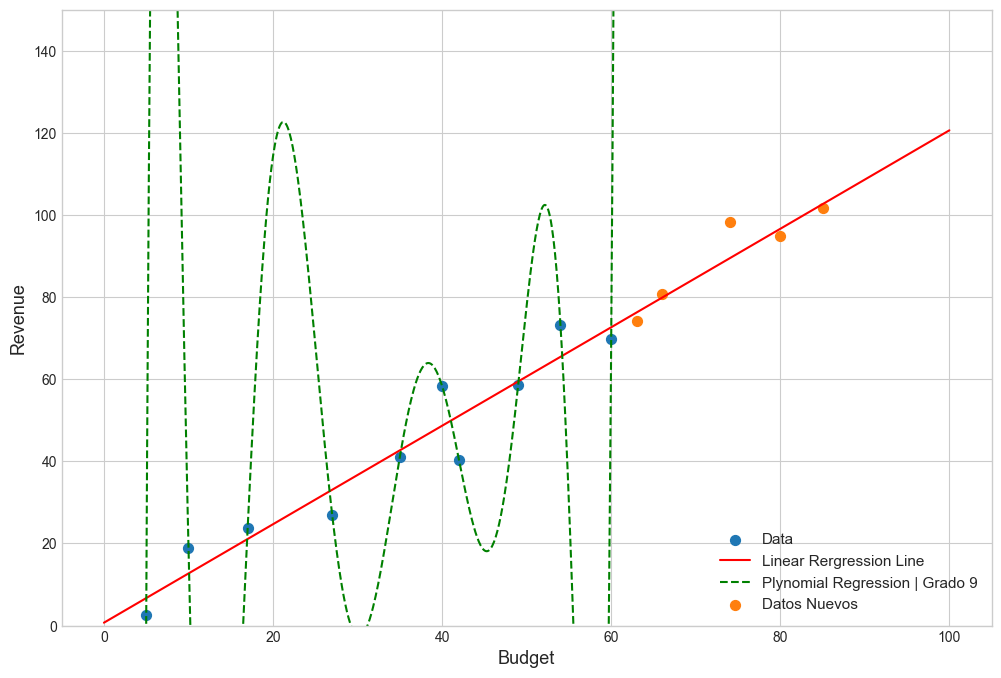

In [23]:
plt.figure(figsize =(12, 8))
plt.scatter(x= df.budget, y= df.revenue, s = 50, label = "Data")
plt.plot(x_lin, y_lin, c = "red", label = "Linear Rergression Line")
plt.plot(x_poly, y_poly, c = "green", label = "Plynomial Regression | Grado 9", linestyle = "--")
plt.scatter(x= df_new.budget, y = df_new.revenue, s = 50, label = "Datos Nuevos")
plt.xlabel("Budget", fontsize = 13)
plt.ylabel("Revenue", fontsize = 13)
plt.legend(fontsize = 11, loc = 4)
plt.ylim(0, 150)
plt.show()


En la gráfica anterior se ve que el modelo polinómico no toma en cuenta los datos nuevos, esto parece un error del profesor porque estos datos no se tomaron en cuenta para el ajuste polinómico. De todas maneras, el instructor afirma que este comportamiento es un ejemplo de sobreajuste (overfitting).  
Las soluciones que sugiere para evitar el sobreajuste son:
- usar un modelo más simple con menos parámetros (modelo lineal en lugar de polinómico)
- utilizar más y mejores datos (eliminar los valores aislados o "outliers" y los errores)
- Restringir el modelo, hacer el modelo más simple con regularización 

<h3> SubAjuste (Underfitting)</h3>
El subajuste es lo opuesto a sobreajuste implica un modelo que no funciona bien con los datos originales de entrenamiento y tampoco generaliza bien los datos nuevos (de prueba).  
De tal manera que el subajuste surge cuando el modelo es demasiado simple para aprender la estructura subyacente de los datos.  
Para ejemplificar vamos a descartar el parámetro slope de nuestro modelo lineal (slope = 0), en consecuencia nuestro modelo consiste de una ecuación de ganancias igual a una constante (la intercepción).

In [24]:
mean = df.revenue.mean() # media de las ganancias (variable dependiente)
mean

np.float64(41.35000000000001)

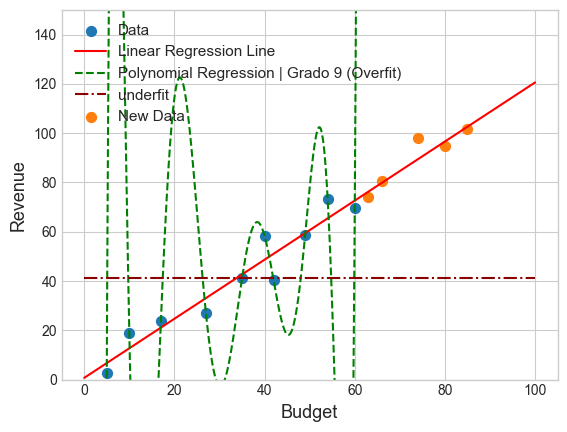

In [25]:
plt.Figure(figsize=(12,8))
plt.scatter(x = df.budget, y = df.revenue, s = 50, label = "Data")
plt.plot(x_lin, y_lin, c = "red", label =  "Linear Regression Line")
plt.plot(x_poly, y_poly, label = "Polynomial Regression | Grado 9 (Overfit)", linestyle = "--", c = "green")
plt.hlines(y = mean, xmin=0, xmax=100, linestyle = "-.", color = "darkred", label = "underfit")
plt.scatter(x= df_new.budget, y= df_new.revenue, s = 50, label = "New Data")
plt.xlabel("Budget", fontsize = 13)
plt.ylabel("Revenue", fontsize = 13)
plt.legend(fontsize = 11, loc = 2)
plt.ylim(0, 150)
plt.show()

El modelo simplificado (pendiente = 0, intercepcion) corresponde a la recta horizontal color púrpura se ve que no ajusta a los datos de entrenamiento (azul) tampoco a los datos nuevos (datos de prueba naranja).  
Ahora bien , en los casos cuando hay una verdadera relación lineal, un modelo de regresión lineal tiende a sobre ajustar el conjunto de entrenamiento por definición porque la recta de regresión lineal es la recta que mejor se ajusta al conjunto de entrenamiento y es bastante probable que sobreajuste los datos de entrenamiento al menos en cierta extensión.  
La soluyción a este tema pueder ser: a) eliminar la pendiente que resulta en una recta horizontal que subajusta los datos, o, b) elegir un camino intermedio consistente en permitir valores pequeños de la pendiente (se fuerza al algoritmo a escoger estos valores de la pendiente) lo cual resulta en una recta que no es horizontal sino que tiene cierta pendiente pequeña (flatter line).
Así podemos decir que estos modelos tienen más de un parámetro pero menos de dos y este podría ser el modelo y la recta que mejor generaliza.
Este proceso que fuerza al algoritmo a mantener pequeña la pendiente se llama regularización; de tal manera que si el modelo sobreajusta se incrementa la regularización y por el contrario si el modelo subajusta se reduce la regularización.

<h3>Obteniendo los Datos</h3>

In [26]:
data = pd.read_csv("five_minute.csv", parse_dates=["time"], index_col= "time")
data

,price
time,
2019-01-01 22:00:00+00:00,1.146580
2019-01-01 22:05:00+00:00,1.146350
2019-01-01 22:10:00+00:00,1.146320
2019-01-01 22:15:00+00:00,1.146320
2019-01-01 22:20:00+00:00,1.146530
...,...
2019-12-30 23:35:00+00:00,1.120180
2019-12-30 23:40:00+00:00,1.120210
2019-12-30 23:45:00+00:00,1.120295


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 73720 entries, 2019-01-01 22:00:00+00:00 to 2019-12-30 23:55:00+00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   73720 non-null  float64
dtypes: float64(1)
memory usage: 1.1 MB


Nuestros datos consisten en precios del instrumento EURUSD en el rango del 01-01-2019 al 30-12-2019 con una granularidad de 5 minutos. En total tenemos 73720 registros o filas, sin datos nulos.

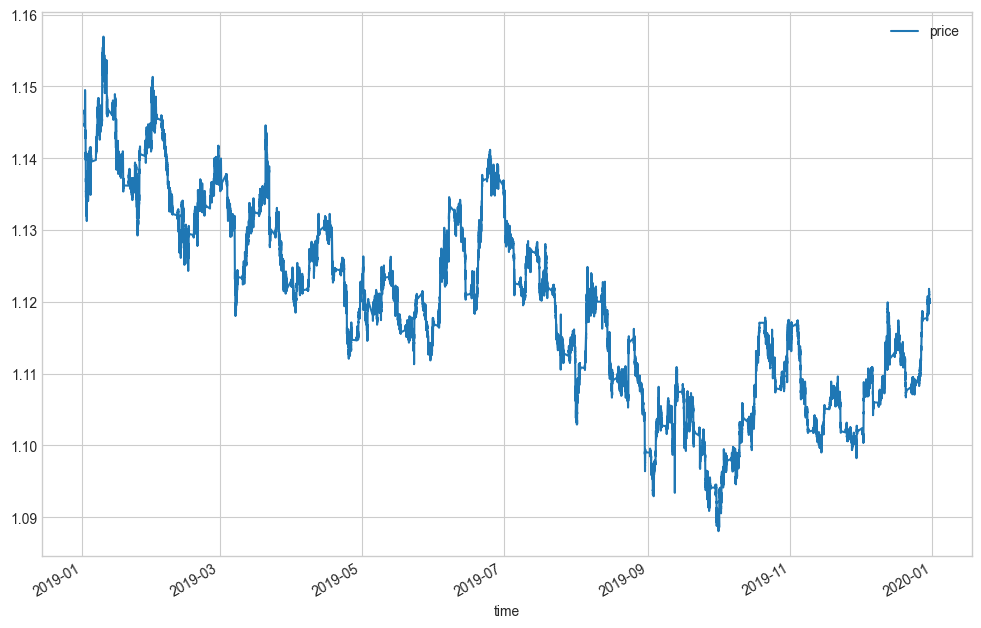

In [29]:
# grafica de los datos
data.plot(figsize = (12,8))
plt.show()

<Axes: xlabel='time'>

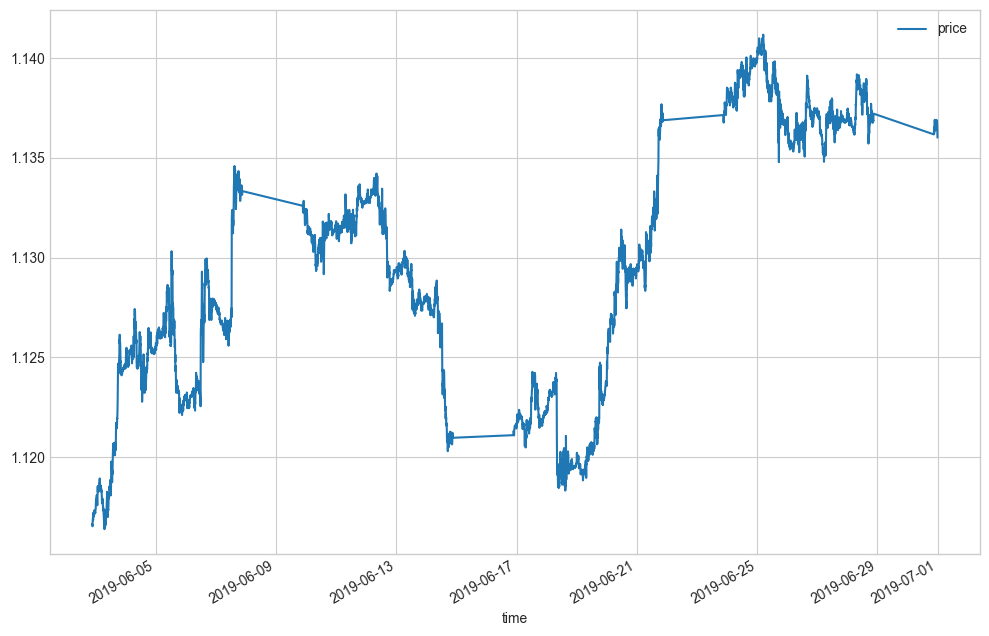

In [30]:
#graficar un mes específico por ejemplo junio
data.loc["2019-06"].plot(figsize= (12, 8))

## Un Modelo Lineal simple para predecir Ganancias Financieras

Ahora vamos a crear un modelo simple de regresión lineal para predecir ganancias financieras, pero hay que tener en cuenta un tema muy inportante: vamos a predecir ganancias que corresponden a la variable independiente en nuestro modelo.  
Ahora si Ud. ve a alguien prediciendo precios en lugar de ganancias , entonces debería parar inmediatamente de leer o mirar lo que está viendo, porque esto está mal definitavemente en tanto que quiebra un par de leyes y reglas en finanzas y estadísitca.  
Pero, hay que admitir que la predicción de precios es un asunto divertido porque da la impresión de que se pueden predecir precios con alta precisión. Sin embargo, esto es una ilusión dado que los resultados son completamentee inútiles para el trading y la inversión; porque es el caso que en finanzas todo se trata de ganancias y no en precios absolutos y aquellos que predicen precios no tienen idea de lo que están haciendo o ellos son estafadores y malhechores intencionales.